1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


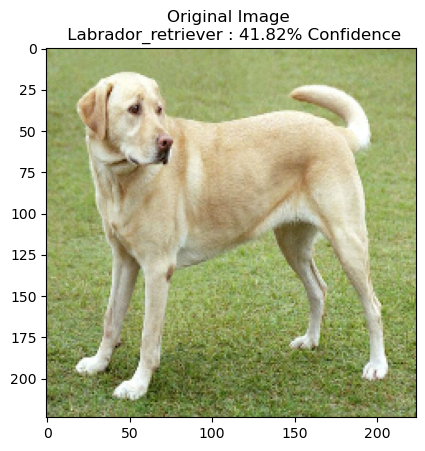

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


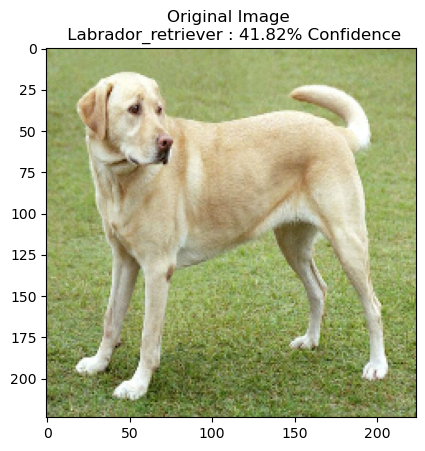

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


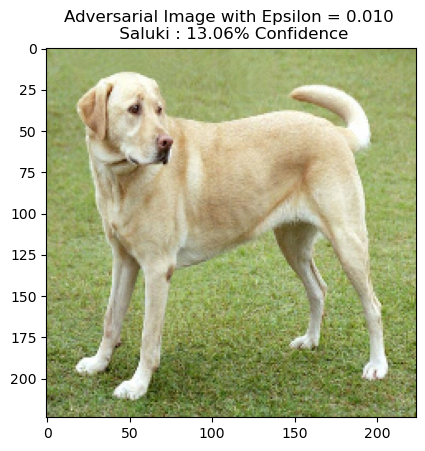

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


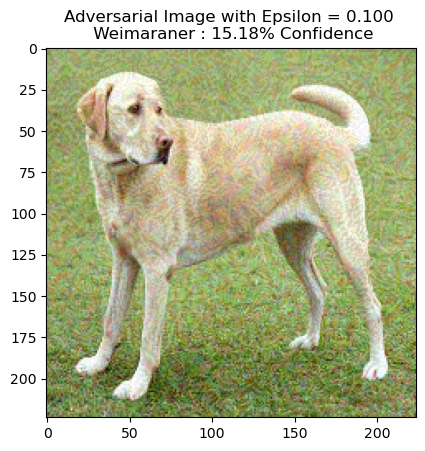

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


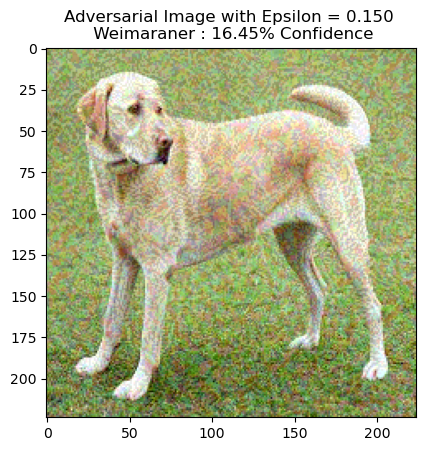

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


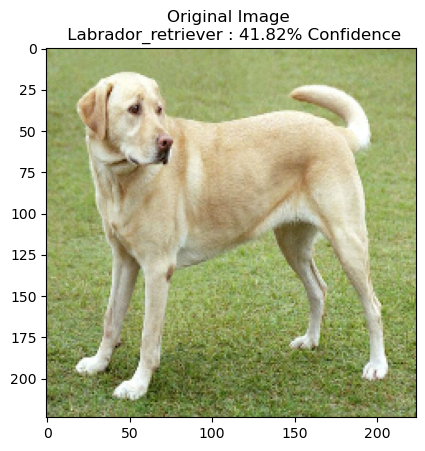

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


TypeError: 'float' object is not iterable

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from methods.fgsm import create_adversarial_pattern
from models.mobilenet import load_mobilenet_model, preprocess_image, decode_predictions

def display_image(image, description, model):
    probs = model.predict(image)
    _, label, confidence = decode_predictions(probs)
    plt.figure()
    plt.imshow(image[0] * 0.5 + 0.5)
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description, label, confidence * 100))
    plt.show()

def main():
    # Load model
    model = load_mobilenet_model()

    # Load and preprocess image
    image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
    image_raw = tf.io.read_file(image_path)
    image = tf.image.decode_image(image_raw)
    image = preprocess_image(image)

    # Display original image and prediction
    display_image(image, 'Original Image', model)

    # Create adversarial pattern
    prediction = model.predict(image)
    label = tf.one_hot(tf.argmax(prediction[0]), prediction.shape[-1])
    label = tf.reshape(label, (1, prediction.shape[-1]))

    perturbations = create_adversarial_pattern(image, label, model)

    # Display adversarial images with different epsilons
    epsilons = [0, 0.01, 0.1, 0.15]
    for eps in epsilons:
        adv_image = image + eps * perturbations
        adv_image = tf.clip_by_value(adv_image, -1, 1)
        description = 'Adversarial Image with Epsilon = {:0.3f}'.format(eps) if eps else 'Original Image'
        display_image(adv_image, description, model)

if __name__ == "__main__":
    main()

def display_image(image, description, model):
    probs = model.predict(image)
    _, label, confidence = decode_predictions(probs)
    plt.figure()
    plt.imshow(image[0] * 0.5 + 0.5)
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description, label, confidence * 100))
    plt.show()

def main():
    # Load model
    model = load_mobilenet_model()

    # Load and preprocess image
    image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
    image_raw = tf.io.read_file(image_path)
    image = tf.image.decode_image(image_raw)
    image = preprocess_image(image)

    # Display original image and prediction
    display_image(image, 'Original Image', model)

    # Create adversarial pattern
    prediction = model.predict(image)
    label = tf.one_hot(tf.argmax(prediction[0]), prediction.shape[-1])
    label = tf.reshape(label, (1, prediction.shape[-1]))

    perturbations = create_adversarial_pattern(image, label, model)

    # Display adversarial images with different epsilons
    #epsilons = [0, 0.01, 0.1, 0.15]
    epsilons=0.01
    for eps in epsilons:
        adv_image = image + eps * perturbations
        adv_image = tf.clip_by_value(adv_image, -1, 1)
        description = 'Adversarial Image with Epsilon = {:0.3f}'.format(eps) if eps else 'Original Image'
        display_image(adv_image, description, model)

if __name__ == "__main__":
    main()